In [1]:
!pip install -Uqq fastai
!pip install timm
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from fastai.vision.all import *
from fastai.data.all import *
import timm
from fastbook import *

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
path = '/content/gdrive/MyDrive/Colab Notebooks/frames'

In [5]:
fnames = get_image_files(path)

In [6]:
def label_func(name):
  return name.parent.name

In [7]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms = aug_transforms())

In [8]:
dls = dblock.dataloaders(path)

In [9]:
# dls.show_batch()

In [10]:
learn = vision_learner(dls, 'convnext_small_in22k', metrics=error_rate)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_22k_224.pth


SuggestedLRs(valley=0.0004786300996784121)

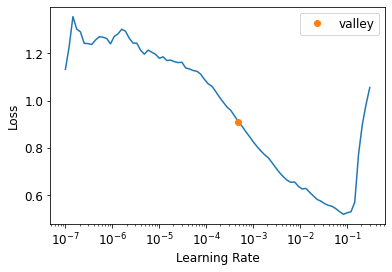

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(3,base_lr = .001)


epoch,train_loss,valid_loss,error_rate,time
0,0.460472,0.084027,0.025641,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.116651,0.057777,0.025641,01:28
1,0.097390,0.178484,0.085470,01:27
2,0.083493,0.181162,0.076923,01:26


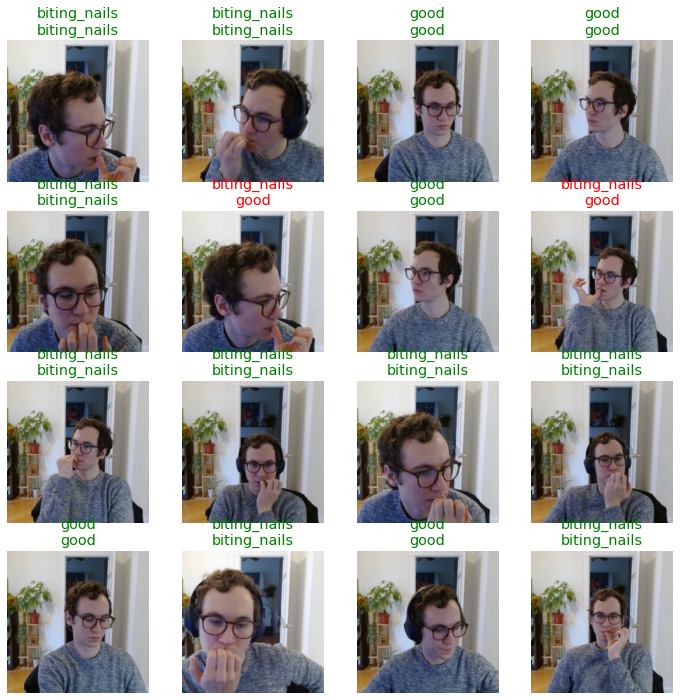

In [13]:
learn.show_results(max_n=16)

In [16]:
 interp = Interpretation.from_learner(learn)

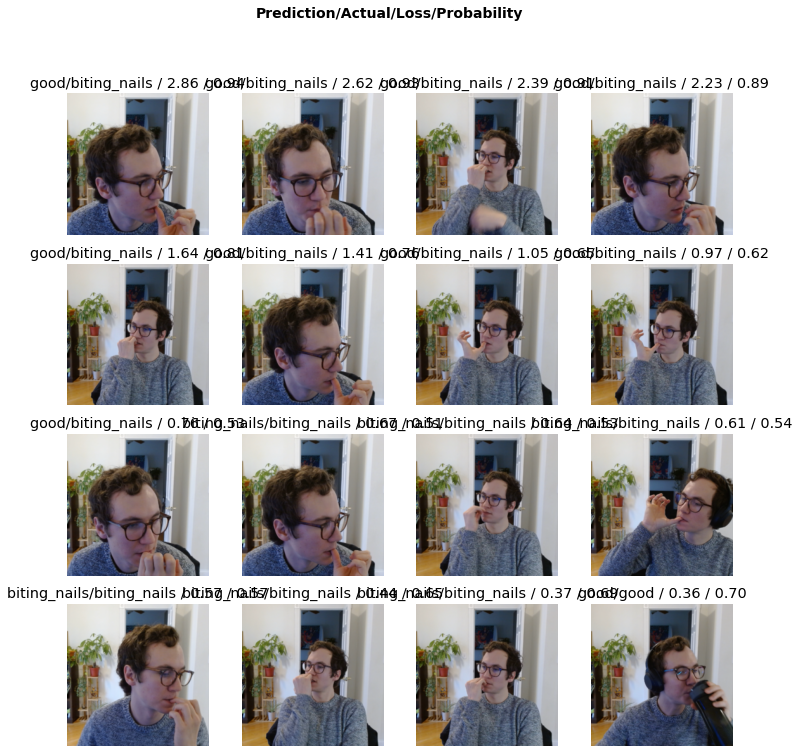

In [17]:
interp.plot_top_losses(16)

In [20]:
cls_interp = ClassificationInterpretation.from_learner(learn)

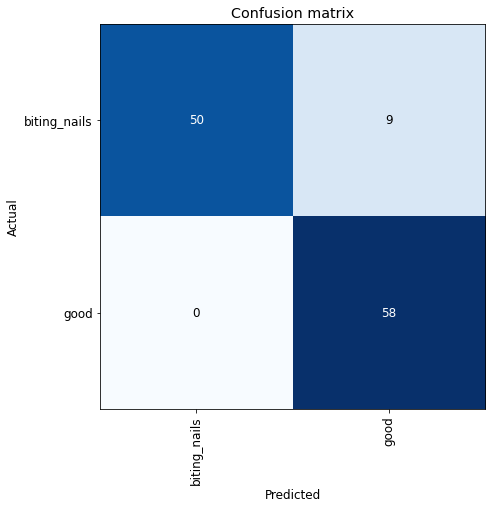

In [21]:
losses,idxs = cls_interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
cls_interp.plot_confusion_matrix(figsize=(7,7))